 ML Project- Diabetes Prediction using Machine Learning

## Problem Statement

Problem Statement:Diabetes is a chronic and life-threatening disease that affects millions of people.
Early detection of diabetes is crucial in preventing severe complications such as heart disease, kidney failure, and vision loss. However, manual diagnosis based on medical tests can be time-consuming and prone to human error.
This project aims to predict whether a patient is diabetic or non-diabetic.

## Objectives

Objectives-
1. To analyze the P Diabetes Dataset and perform exploratory data analysis to understand data patterns and quality.
2. To preprocess the dataset and apply multiple supervised machine learning classification algorithms for diabetes prediction.
3. To evaluate and compare different models and identify the most precise model.

## Who can use this project

 Who Can Use This Project
- Healthcare professionals
- Hospitals
- Students and researchers

## Dataset Description

Dataset Description:
The Pima Indians Diabetes Dataset is a widely used medical dataset for diabetes prediction.
It contains medical diagnostic information of female patients of Pima Indian heritage.
The dataset consists of 768 row(records/observation) and 9 columns(Attribute/Feature), out of which 8 are independent features
and 1 is a dependent target variable named "Outcome".
All attributes(Columns) in the dataset are numerical, making it suitable for machine learning classification models.

## Importing Libraries

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Model selection
from sklearn.model_selection import GridSearchCV
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Load Dataset

In [26]:

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dataset Shape

In [27]:
df.shape

(768, 9)

## Dataset Info

In [28]:
##To view dataframe Structure(Non-Null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistical Summary

In [29]:
#Viewing Statistical Features of a Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Null Value Check

In [30]:
##Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## EDA: Target Distribution

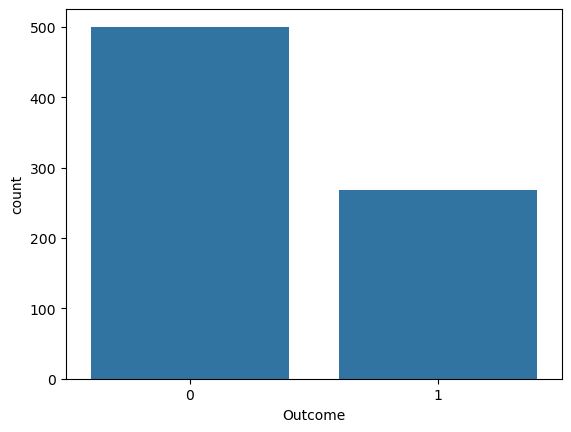

In [31]:
#Countplot for Target Distribution
sns.countplot(x='Outcome', data=df)
plt.show()
#Outcome=0---Non-Diabetic patient
#Outcome=1---Diabetic Patient
#The dataset is slightly imbalanced..500 patients are non-diabetic and 268 are diabetic.

## EDA: Feature Distributions

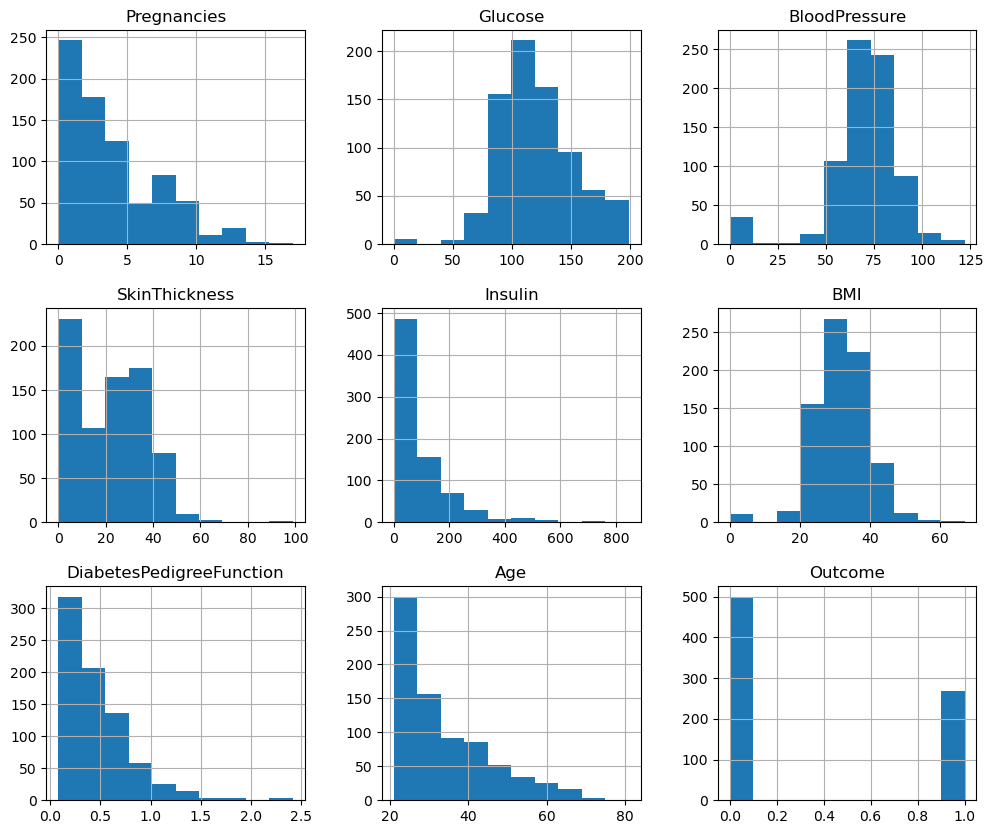

In [32]:
df.hist(figsize=(12,10)) #12- width  of figure and 10 being height
plt.show()
#Feature Distribution-Shows how every feature is spread across the dataset
#Histogram show that most features are positively skewed, especially Insulin and DiabetesPedigreeFunction.
#X-axis shows feature values while Y-axis shows frequency(number of patients)

Pregnancies---show rightward skewness(since most numbers are around 0-5)
Glucose---slightly right skewed
Skin Thickness---Positively skewed
Insulin---Right skewed
Diabetes Pedigree Function---Strongly skewed towards the right
Age---Positively skewed
Outcome variable---shows slight imbalance

## EDA: Boxplots

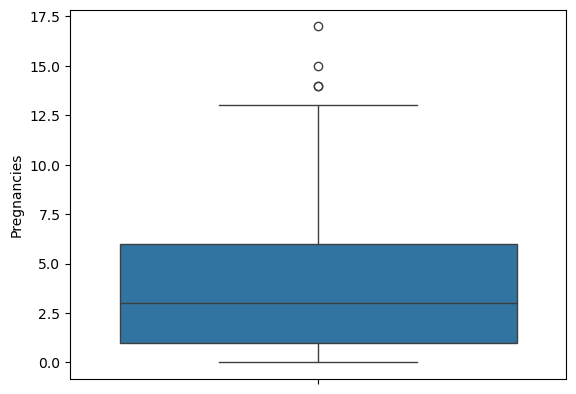

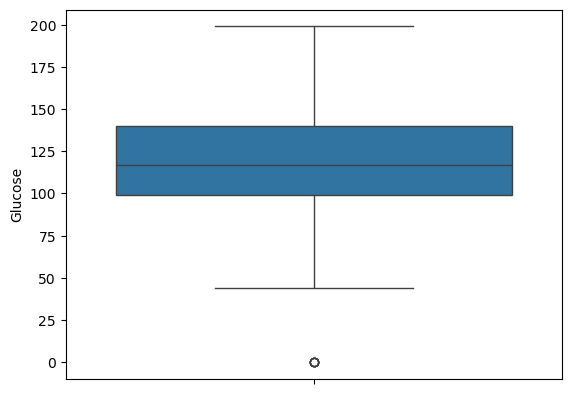

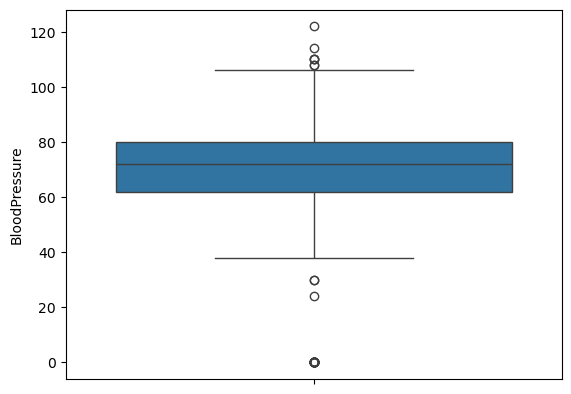

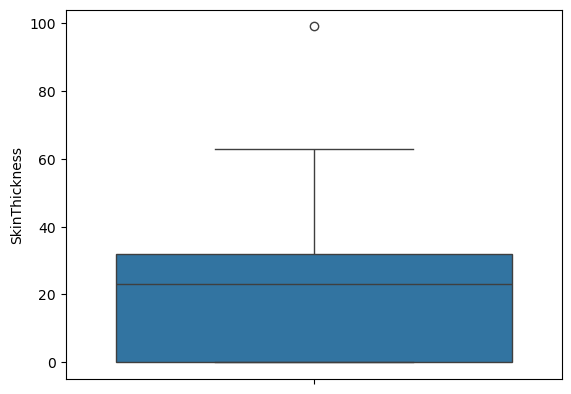

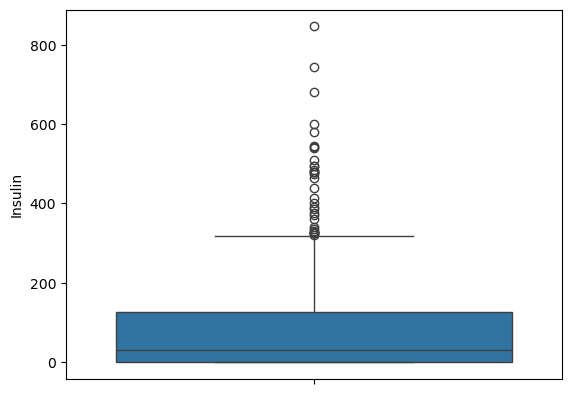

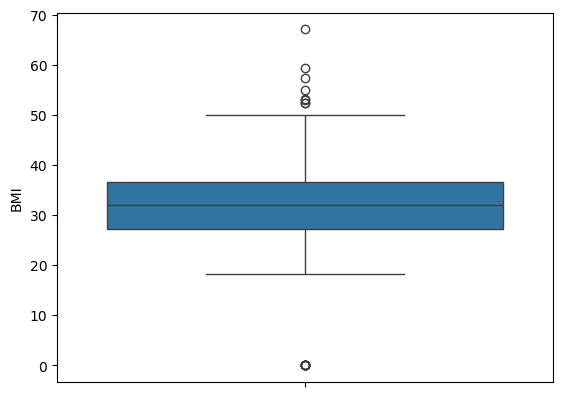

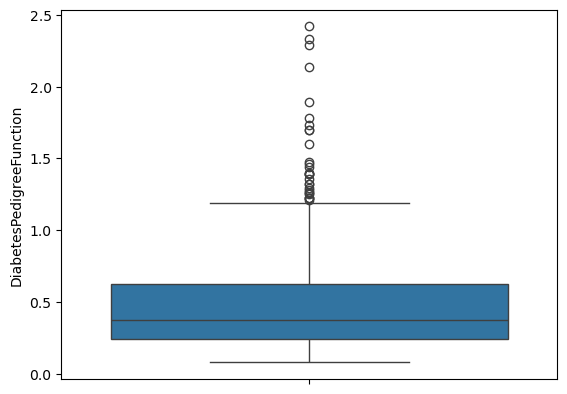

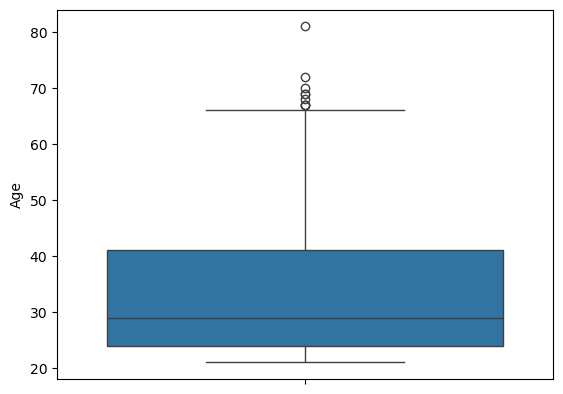

In [33]:
#Box-plot for outlier detection
#Boxplots help identify extreme values in numerical features.
#Histplot helps us understand spread,skewness and frequency
for col in df.drop('Outcome', axis=1).columns:
    sns.boxplot(df[col])
    plt.show()

## EDA-SKEWNESS

In [34]:
#Skewness
from scipy.stats import skew

In [35]:
for col in df.drop('Outcome', axis=1).columns:
    print(col, ":", skew(df[col])) #Takes one feature column and calculates skewness

Pregnancies : 0.8999119408414357
Glucose : 0.17341395519987735
BloodPressure : -1.8400052311728738
SkinThickness : 0.109158762323673
Insulin : 2.2678104585131753
BMI : -0.42814327880861786
DiabetesPedigreeFunction : 1.9161592037386292
Age : 1.127389259531697


 Skewness Interpretation

The skewness values indicate that most features exhibit **positive skewness**, meaning the distributions are right-tailed.

- Pregnancies (0.89)** show mild positive skewness
- SkinThickness (0.11)---Glucose (0.17)---Nearly symmetric, while Age (1.13)** show moderate positive skewness
- Insulin (2.26)** and **DiabetesPedigreeFunction (1.91)** show high positive skewness
- Negative skewness obtained for Blood Pressure and BMI

The skewness patterns are consistent with observations from box plots.  
No data transformation is applied, as these medical measurements naturally exhibit skewness and preserving original values is important for clinical interpretation.


In [36]:
#Checking for object datatype
obj_cols = df.select_dtypes("object").columns
obj_cols
#Output shows No object (categorical) columns are present in your dataset and all features are numerical, which is ideal for machine learning models.

Index([], dtype='object')

In [37]:
#Value Counts-Count of Diabetic and Non-Diabetic Patients
df['Outcome'].value_counts()
#Output shows 500 non-diabetic patients,268 diabetic patient

Outcome
0    500
1    268
Name: count, dtype: int64

## EDA-Correlation Heatmap

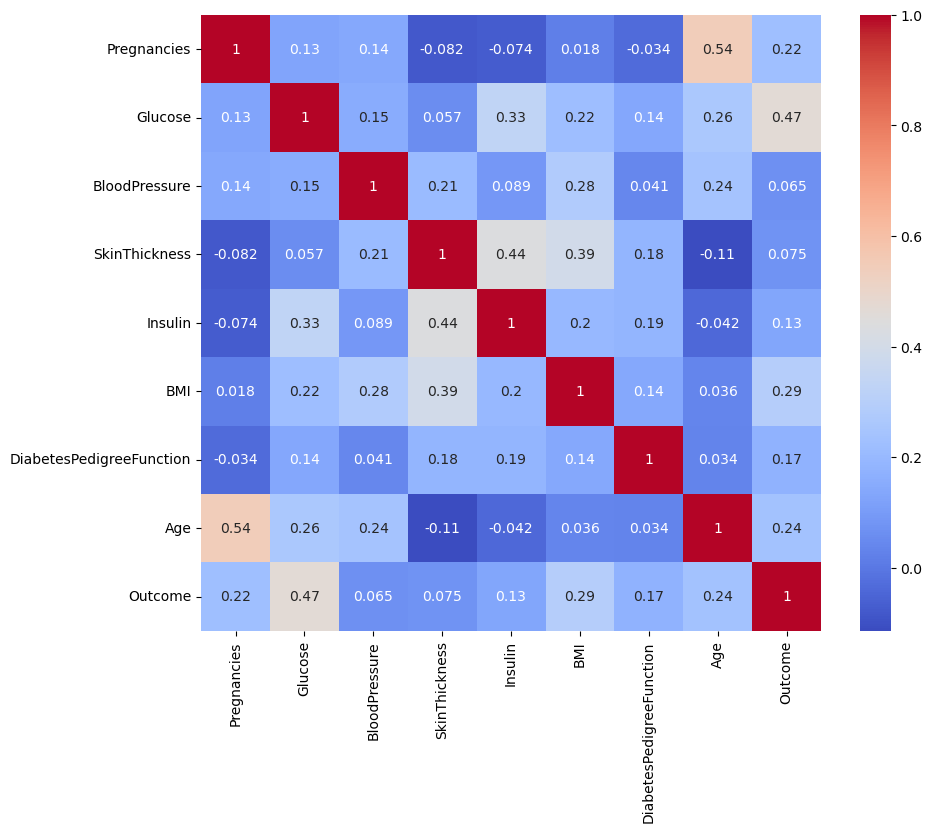

In [38]:
#A Correlation heatmap visually represent strength and direction of linear relationship between numerical features
#Checking for Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
#Highly correlated features include- Age and Pregnancies (0.54)---Glucose and Outcome (0.47) which has highest positive correlation with Diabetes
#cmap is color map, while 'coolwarm' means color scheme to display values in heatmap


## Feature & Target

In [39]:
#Separating Label(Target) and Data
#X=input features and y=Target
X = df.drop('Outcome', axis=1) #For features(X)---use drop---X does not contain target selection---axis=1 means drop column
y = df['Outcome'] #For Target(Y)---Use column selection
X.head(), y.head() 

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

## Train-Test Split

Train-Test Split: The dataset is split into:80% Training data 20% Testing data
If we train and test on same data, model will memorize,hence we want to check how well it performs on new patients
X_train-contains feature data used to train the model, y_train-contains actual labels corresponding to X_train
X_test contains unseen feature data used to evaluate model, y_test contains true labels for X_test

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#Here, random state fixes randomness.It is basically a seed value which helps to keep results reproducible

## Scaling

Feature Scaling-StandardScaler is used to bring all features to the same scale. 
When algorithm is distance based, we use standard scaling, while min-max scaling is used when no outliers are present

In [41]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training: 
We train the following models:Logistic Regression,Decision Tree,Random Forest
In Logistic Regression, there is no feature selection like Lasso.

## Model Building-Logistic Regression

In [42]:
#For Logistic Regression, formula: z=(w1x1)+(w2x2)+(w3x3)+...+b  ---(Where w=weights, x=input features(Glucose,BMI),b=bias
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
#This is checked-Binary classification model(o/p is 0 or 1),Linear decision boundary,Probability-based prediction
#lr is a supervised ML Classification algorithm used for predicting binary outcomes
#max_iter is maximum weights solver can update

LogisticRegression(max_iter=1000)

In [43]:
ypred = lr.predict(X_test)
#Model performance on un-seen data checked

In [44]:
#Confusion Matrix-LR
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred)
#Compare below output with
#[[TN, FP],
#[FN, TP]]

array([[79, 20],
       [18, 37]])

In [45]:
#In above Confusion Matrix, FN matters more, bcoz False Negatives are dangerous in medical field

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))
#Classification report-Precision,Recall and F1 Score checked.
#Classification Report is a performance evaluation summary to predict how well a machine learning model prepares different classes.

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Class-wise interpretation
Class 0 (Non-diabetic)
Precision: 0.81→ When the model predicts non-diabetic, it is correct 81% of the time
Recall: 0.80→ 80% of actual non-diabetic patients are correctly identified
F1-score: 0.81→ Strong and balanced performance
Insight- Model performs well for non-diabetic cases.

Classification Report – Logistic Regression
The model performs well for non-diabetic patients, achieving a recall of 0.80.  
For diabetic patients, the recall is 0.67, indicating that approximately 67% of diabetic cases are correctly identified.
Due to the medical nature of the problem, recall for the diabetic class and ROC–AUC are considered more important than accuracy.

In [47]:
#Threshold Experimentation (Logistic Regression)
#Threshold concept in Diabetes-At what probability should we call this patient diabetic?
#Threshold Experimentation- Changing the cutoff value and observing how model performance changes and Calculating recall,precision,FN,FP
#Run this code after grid search cv is executed
#Support is number of actual samples of each class

# Step 1: Get predicted probabilities
y_prob = best_lr.predict_proba(X_test)[:, 1]
# Step 2: Apply new threshold (example: 0.3)
threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)
print("Classification Report (Threshold = 0.3)")
print(classification_report(y_test, y_pred_threshold))

Classification Report (Threshold = 0.3)
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        99
           1       0.55      0.76      0.64        55

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.73      0.69      0.69       154



In [48]:
#ROC-AUC Score-LR
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)
#ROC-AUC score is a performance metric used to evaluate binary classification model

np.float64(0.8146923783287419)

ROC–AUC measures the model’s ability to distinguish between diabetic and non-diabetic patients
A value:
0.5 → no discrimination (random guessing)...0.7–0.8 → acceptable...0.8–0.9 → good...0.9 → excellent
score obtained 0.81 indicates good discriminative ability.

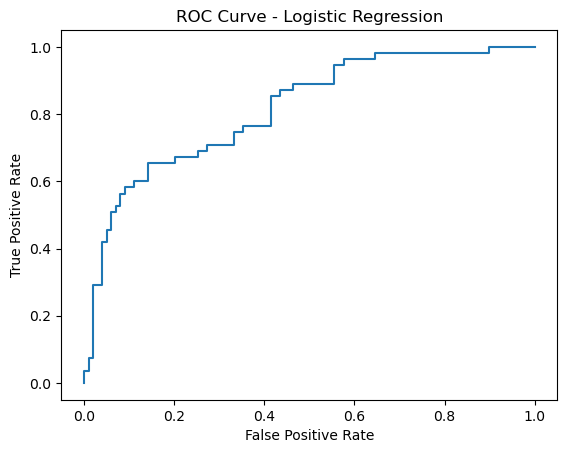

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()
#ROC-Receiver Operating Characteristic Curve is a graph between FPR/False Alarm (X-axis) and TPR/Sensitivity also called "Recall' (Y-axis)
#TPR=TP/(TP+FN)---Correctly identified Diabetic Patients
#FPR=FP/(FP+TN)---Wrongly classified Healthy Patients

## Model Building-Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
#Handles feature selection automatically
#random_state 42 ensures reproducibility,it is a commonly used convention

DecisionTreeClassifier(random_state=42)

In [51]:
ypred = dt.predict(X_test)
#Model performance on un-seen data

In [52]:
#Confusion Matrix-Decision Tree
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred)
#Compare below output with
#[[TN, FP],
#[FN, TP]]

array([[75, 24],
       [15, 40]])

Confusion Matrix Interpretation – Decision Tree
The confusion matrix shows that:
- 75 non-diabetic patients were correctly classified
- 40 diabetic patients were correctly identified
- 24 non-diabetic patients were incorrectly classified as diabetic
- 15 diabetic patients were misclassified as non-diabetic
Compared to Logistic Regression, the Decision Tree model reduces the number of false negatives, making it more suitable for diabetes detection.

In [53]:
#Classification Report- Decision Tree 
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [54]:
#ROC/AUC Score-Decision Tree
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)

np.float64(0.7424242424242424)

A ROC–AUC of 0.74 indicates acceptable discriminative ability
It is lower than Logistic Regression (0.81)
Decision Tree is better at:Capturing non-linear patterns,Reducing false negatives
But weaker at:Overall class separation

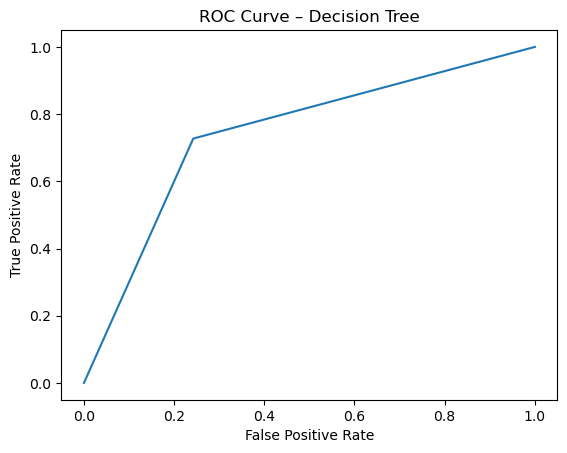

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.show()
#TPR also called as 'Recall' or 'Sensitivity'-Out of all positive cases,how many were correctly identified
#TPR=TP/(TP+TN)
#FPR-Out of all actual negative cases,how many were wrongly predicted as positive
#FPR=FP/(FP+TN)

The shape of ROC Curve is almost a straight line with sharp corners,it is just slightly better than random guess.
Which means, Decision Tree has weak discriminative ability.
Compared to Logistic Regression, it is less smooth and less reliable for ranking patients.

## Model Building-Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
#Random Forest is Ensemble of multiple decision tree to improve accuracy and reduce overfitting
#Here,Forest---Collection of many trees, while Random---randomness while selecting data samples and features for splitting
#Reduces overfitting compared to single tree

RandomForestClassifier(random_state=42)

In [58]:
y_pred = rf.predict(X_test)

In [59]:
#Confusion Matrix-RF
#Confusion Matrix shows how many predictions were right or wrong
confusion_matrix(y_test, y_pred)
#Here,FN is 21

array([[77, 22],
       [21, 34]])

In [60]:
#Classification Report-RF (Summary of all evaluation metrics)
print(classification_report(y_test, y_pred))
#Precision- Out of all predicted positives, how many were correct..Precision=TP/(TP+FP)
#Recall- Out of all actual positives, how many were correctly identified...In Diabetes prediction, recall is more important 
#F1 Score- (2xPrecisionxRecall)/(Precision+Recall)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [61]:
#ROC/AUC Score-RF
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

np.float64(0.8124885215794309)

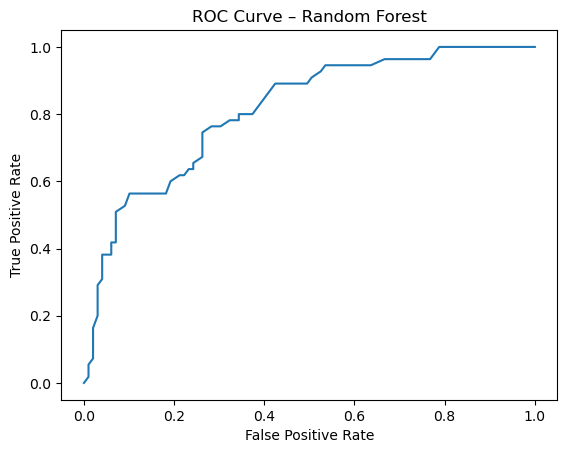

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.show()
#Checking for ROC/AUC Curve
#Threshold independent performance checked

## Hyper Parameter Tuning
  LR
  DT
  RF

In [63]:
# Hyperparameter Tuning - Logistic Regression---
#Hyperparameter Tuning means finding best settings(control values) for machine learning model to improve performance
#Parameters---are learned from data, while hyperparameters---are set by us before training
#C,penalty and solver are decided by us(hyperparameters), while weights of lr---decided by us
#Grid Search cv is a technique used to find best hyper parameters for a machine learning model,it selects best conination using cv
#Grid Search cv tries all best parameter values and selects best using cross-validation, while cv splits data multiple times
#To minimize loss function, we use 'solver'
#lbfgs is used to minimize loss function

lr_param_grid = {
    'C': [2, 3, 4, 5, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'], #Limited-memory Broyden–Fletcher–Goldfarb–Shanno...It is the method used to find the best weights (coefficients) that minimize the error.
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring='roc_auc'
)

lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_

print("Best Parameters for Logistic Regression:", lr_grid.best_params_)

y_pred_lr = best_lr.predict(X_test)
#C = Inverse of regularization strength...Small C → Strong regularization...Large C → Weak regularization
#max_iter is maximum number of iterations allowed for solver to converge
#In outupt, we see---Regularization strength is optimal at C=2,Using l2 regularization and using lbfgs solver

Best Parameters for Logistic Regression: {'C': 2, 'penalty': 'l2', 'solver': 'lbfgs'}


In [64]:
# Hyperparameter Tuning - Decision Tree
#Decision Tree splits dataset into smaller groups
#max_depth is max no of levels the tree is allowed to grow
#min_samples_split is minimum no of samples required to split a node
#Concepts like Gini and Entropy involved
#Gini measures impurity
#Gini Index- Gini Index measures how often a randomly chosen element would be incorrectly classified.
#Entropy measures uncertainity(disorder) in data.

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='roc_auc'
)

dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_

print("Best Parameters for Decision Tree:", dt_grid.best_params_)

y_pred_dt = best_dt.predict(X_test)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}


In [65]:
#Hyper Parameter Tuning-For RF
#Hyper Parameter Tuning-It is Finding the best combination of settings (parameters) that control how a model learns
#max_depth (Decision Tree),n_estimators (Random Forest)C (Logistic Regression)
#It reduces Overfitting and improves ROC/AUC
#n_estimator is used in Random Forest and is not applicable for DT
#CV-cv stands for cross-validation. In cv=5, the dataset is split into 5 folds, and the model is trained and validated 5 times. 
#The average performance in CV is used to select the best hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc'
)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

## Best Model Selected

In [66]:
#Best Model after Tuning
best_rf = rf_grid.best_estimator_

In [67]:
#Evaluation of Tuned Model
y_pred_best = best_rf.predict(X_test)
confusion_matrix(y_test, y_pred_best)
#predict calculates probability and applies default threshold of 0.5
#predict is final classification, while predict_proba gives confidence score

array([[84, 15],
       [20, 35]])

In [68]:
y_prob_best = best_rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_best)
#predict_proba returns probability between 0 and 1...predict_proba gives confidence score
#By default:If probability ≥ 0.5 → Class 1...If probability < 0.5 → Class 0...That 0.5 is the threshold.

np.float64(0.8326905417814509)

ROC-AUC Score is 0.8327.
It provides with a very good ability to separate diabetic vs non-diabetic patients.

## Model Comparisons

| Model               | ROC–AUC    | False Negatives (FN) | Interpretation      |
| ------------------- | ---------- | -------------------- | ------------------- |
| Logistic Regression | ~0.815     | **18**               | Stable, balanced    |
| Decision Tree       | ~0.742     | **15**               | Best FN, lower AUC  |
| Random Forest       | ~0.833     | **21**               | Best AUC, higher FN |


KNN was not used because it is sensitive to scaling and skewness, which were intentionally not applied in this project
Best Model Selected-Logistic Regression(Explanation given in Conclusion)

## Conclusion

Conclusion-
In this project, machine learning techniques were applied to predict diabetes using medical diagnostic features.
Exploratory data analysis was performed to understand data distribution, skewness, class imbalance, and feature relationships.  
Logistic Regression, Decision Tree, and Random Forest models were evaluated individually using confusion matrix, classification report, and ROC–AUC metrics.
Although Random Forest achieved strong discriminative performance, Logistic Regression was selected as the final model due to its balanced performance, higher stability, and fewer false negatives compared to other models.  
The results highlight the importance of selecting evaluation metrics appropriate for medical datasets, where minimizing missed diagnoses is critical.

## Future Enhancements

Future Enhancements-
The current project focuses on building and evaluating baseline and tree-based machine learning models for diabetes prediction.  
The following enhancements can be explored in future work:
- Experimenting with additional models such as Gradient Boosting or XGBoost to improve predictive performance.
- Applying threshold tuning or class weighting techniques to further reduce false negatives.
- Performing cross-validation to obtain more robust performance estimates.
- Exploring feature engineering and interaction features to enhance model learning.
- Deploying the trained model as a web application for real-time diabetes risk prediction.